<!-- metadata: title -->
# Kenya Unit Trusts: Money Market Fund(KES) Analysis

<!-- metadata: subtitle -->
> ### Can Kenyan Money Market Funds gurantee capital preservation? 

<!-- metadata: date, type=date -->
**Published Date:**
2024-03-03

<!-- metadata: date-modified, type=date-->
**Date Modified:**
2024-05-05

<!-- metadata: keywords, type=array -->
**Keywords:**
  - money
  - kenya
  - unit-trusts
  - money-market-funds
  - MMF

<!-- metadata: categories, type=array -->
**Categories:**
  - kenya unit trusts
  - data science
  - money

## Description

<!-- metadata: description -->
Money market is a form of unit trust, where fund managers collect money from the group of investors, and invest on their behave. This reduces the overhead of managing your portfio and significantly reduces your risk. Let's statistically and critically analyze Money market funds in Kenya in general using publicly available information and hopefully paint a clearer picture of the state of unit trusts in Kenya. 

- What are the risk factors that exist? 
- What is the performance of money market funds?

## Abstract

<!-- metadata: abstract -->
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.

## Introduction

In Kenya, a good number of the population have a bank account, even if not the traditional bank account. It is estimated that by year 2029, 99.9% of Kenyans will be banked, ^[Population share with banking account in Kenya 2014-2029
Published by J. Degenhard, Jan 30, 2024. <https://www.statista.com/forecasts/1149636/bank-account-penetration-forecast-in-kenya>]. With increase in financial access, financial literacy and regular individuals will want to venture in the teritory of finantial assets huunting for higher interest rates. One of the most attractive entry level high-yield financial asset is the unit trust, specifically the money market funds. Its easy to start, deposit, withdraw, and its interest is daily compunding, while offering higher interest than any bank.

## Analysis

### Imports

In [11]:
import sys
import os

# Add parent directory to sys.path
root_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(root_dir)

%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
from pyppeteer.page import Page
import asyncio
import json
import io
from bs4 import BeautifulSoup, Tag
from urllib.request import urlopen
from pyppeteer.page import Request
from tqdm import tqdm
from python_utils.web_screenshot import web_screenshot_async
from python_utils.get_browser import get_browser_page_async

### Fund Managers

Let's start of by listing all the certified fund mangers in Kenya by CMA.^[Approved Fund Managers by CMA. <https://www.cma.or.ke/licensees-market-players/>]

Lets start with a screenshot of the webpage.

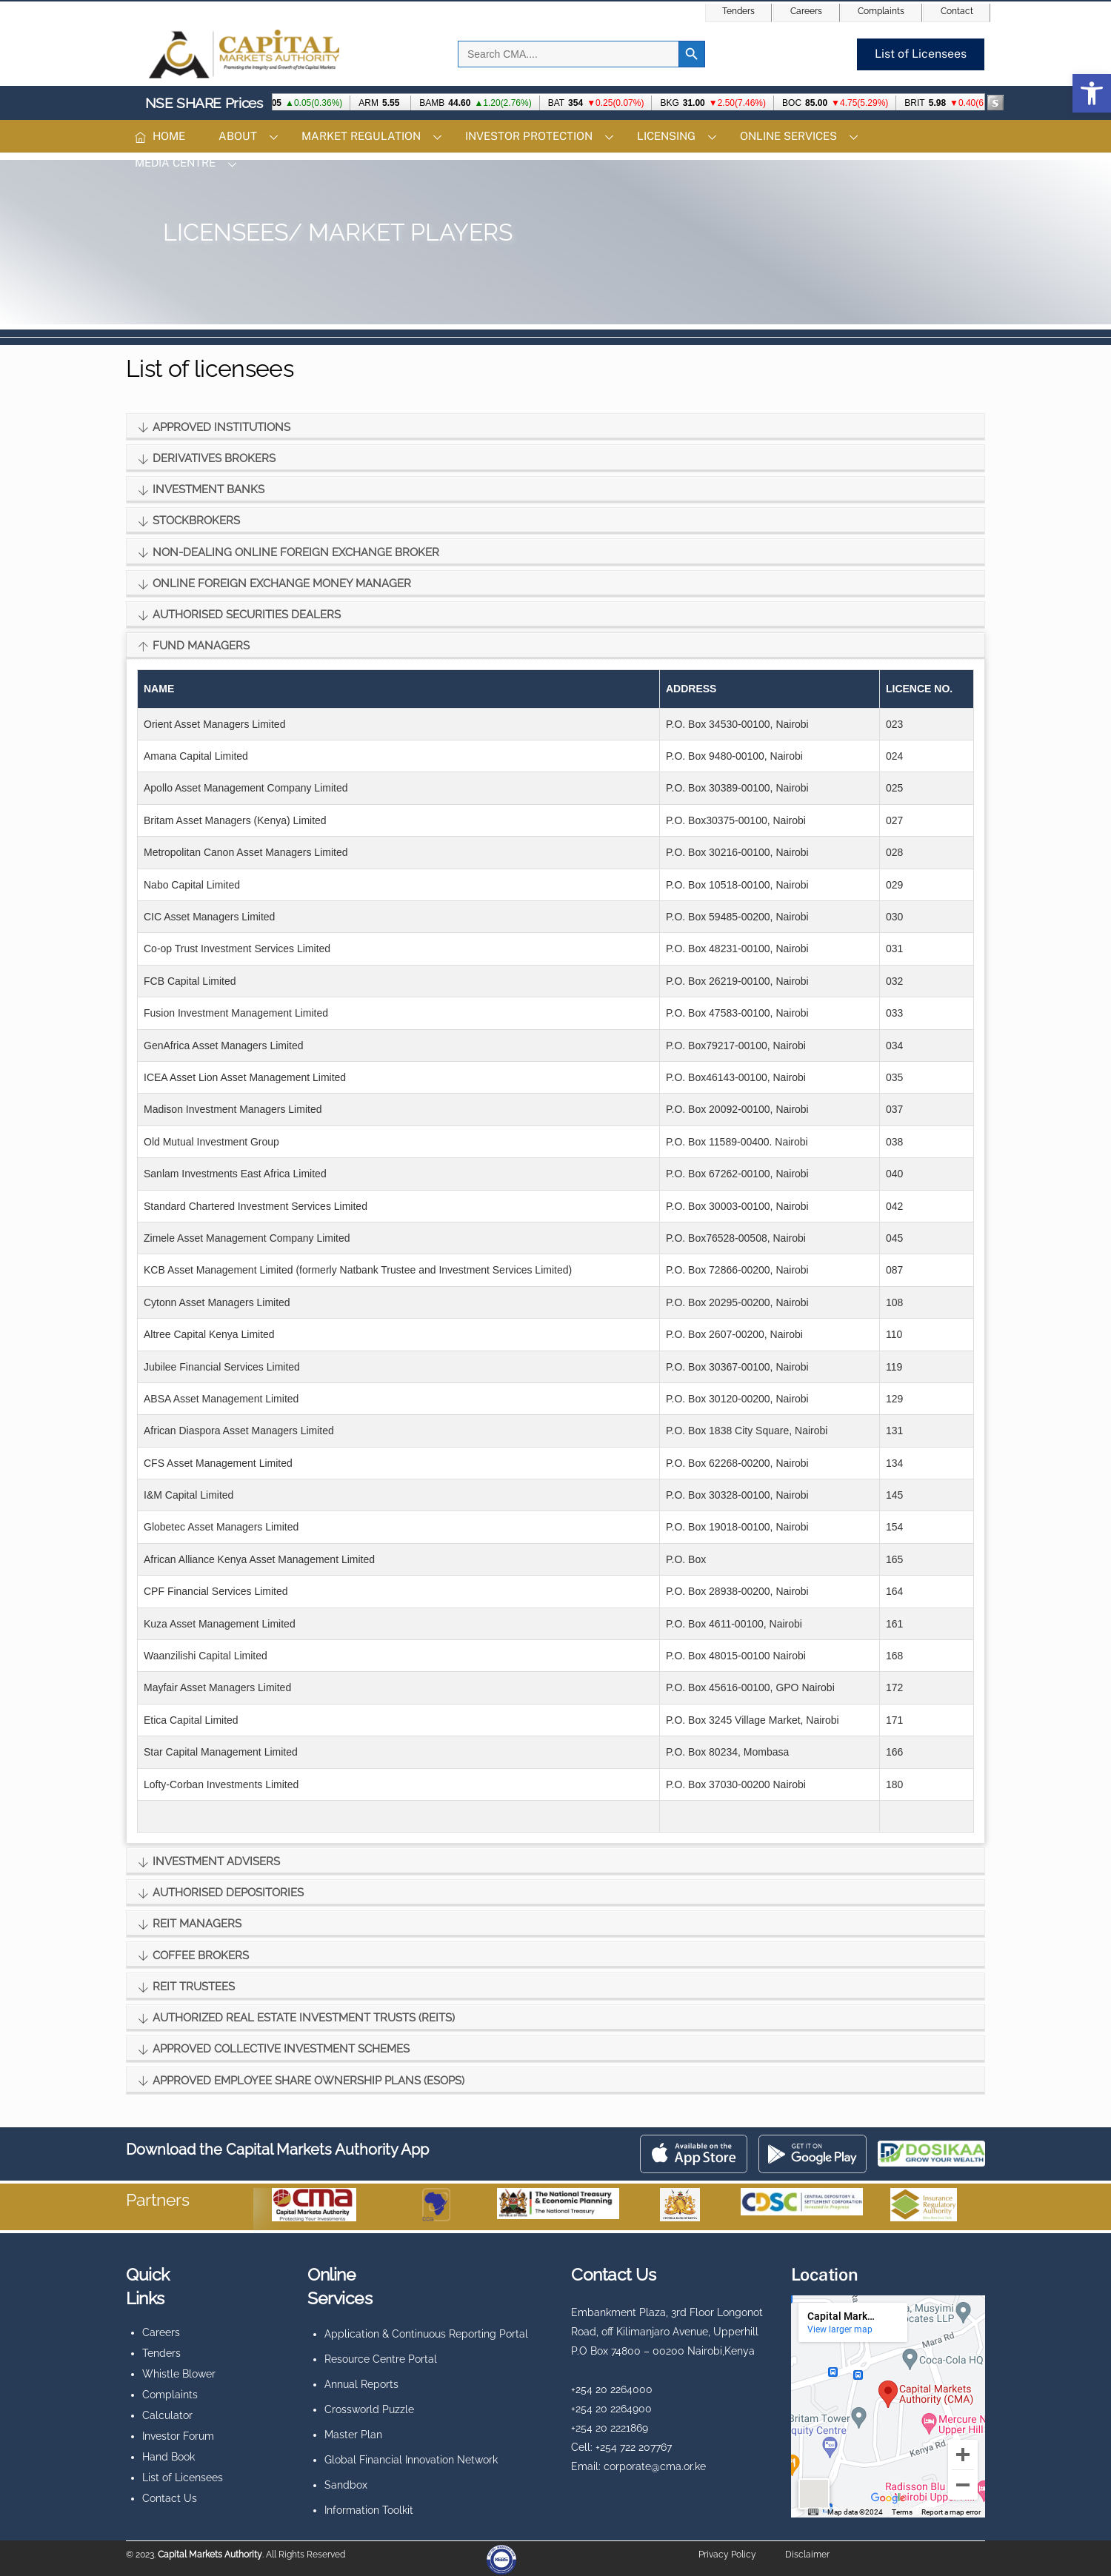

In [3]:
async def action(page: Page):
    await page.waitForSelector('ul.module-accordion')
    elements = await page.querySelectorAll('li .accordion-title')
    # Iterate through the elements to find the one containing 'FUND MANAGERS'
    for element in elements:
        text_content = await page.evaluate('(element) => element.textContent', element)
        if 'FUND MANAGERS' in text_content:
            # Click on the target element
            await element.click()
            break
    else:
        print('Element not found')
    await page.waitForSelector('li.current.builder-accordion-active')
    await asyncio.sleep(1)

await web_screenshot_async(
    "https://www.cma.or.ke/licensees-market-players/", 
    action = action,
    width=1500)

Let's query the "Fund Managers" table.

In [4]:
url_response = urlopen("https://www.cma.or.ke/licensees-market-players/").read()
fund_managers_html_table = BeautifulSoup(url_response, "html.parser")\
    .find('span', string="FUND MANAGERS")\
        .parent\
            .parent\
                .parent\
                    .find('table')

fund_managers_df = pd.read_html(io.StringIO(str(fund_managers_html_table)))[0].dropna()
fund_managers_df

,NAME,ADDRESS,LICENCE NO.
0,Orient Asset Managers Limited,"P.O. Box 34530-00100, Nairobi",23.0
1,Amana Capital Limited,"P.O. Box 9480-00100, Nairobi",24.0
2,Apollo Asset Management Company Limited,"P.O. Box 30389-00100, Nairobi",25.0
3,Britam Asset Managers (Kenya) Limited,"P.O. Box30375-00100, Nairobi",27.0
4,Metropolitan Canon Asset Managers Limited,"P.O. Box 30216-00100, Nairobi",28.0
5,Nabo Capital Limited,"P.O. Box 10518-00100, Nairobi",29.0
6,CIC Asset Managers Limited,"P.O. Box 59485-00200, Nairobi",30.0
7,Co-op Trust Investment Services Limited,"P.O. Box 48231-00100, Nairobi",31.0
8,FCB Capital Limited,"P.O. Box 26219-00100, Nairobi",32.0
9,Fusion Investment Management Limited,"P.O. Box 47583-00100, Nairobi",33.0


The address of `African Alliance Kenya Asset Management Limited` doesnt seem to be valid, lets populate it with `P.O. Box 27639 Nairobi 00506`

In [5]:
fund_managers_df.loc[fund_managers_df['LICENCE NO.'] == 165, 'ADDRESS'] = 'P.O. Box 27639 Nairobi 00506'
fund_managers_df

,NAME,ADDRESS,LICENCE NO.
0,Orient Asset Managers Limited,"P.O. Box 34530-00100, Nairobi",23.0
1,Amana Capital Limited,"P.O. Box 9480-00100, Nairobi",24.0
2,Apollo Asset Management Company Limited,"P.O. Box 30389-00100, Nairobi",25.0
3,Britam Asset Managers (Kenya) Limited,"P.O. Box30375-00100, Nairobi",27.0
4,Metropolitan Canon Asset Managers Limited,"P.O. Box 30216-00100, Nairobi",28.0
5,Nabo Capital Limited,"P.O. Box 10518-00100, Nairobi",29.0
6,CIC Asset Managers Limited,"P.O. Box 59485-00200, Nairobi",30.0
7,Co-op Trust Investment Services Limited,"P.O. Box 48231-00100, Nairobi",31.0
8,FCB Capital Limited,"P.O. Box 26219-00100, Nairobi",32.0
9,Fusion Investment Management Limited,"P.O. Box 47583-00100, Nairobi",33.0


### Add Columns

- Location Coordinates (and google map)
- Headquter location/address/country
- Launch Date
- Risk Profile
- Trustee
- Custodian
- Auditors
- Minimum Investment
- Minimum Additional Investment
- Initial Fee
- Annual Management Fee
- Distribution
- Asset Under Management/Market share
- Advertised Rate [Gross, Net]
- Duration to withdraw
- Security - joint account verification/validation
- has online portal
- Withdraw charges
- Contacts

https://cytonnreport.com/research/cmmf-fact-sheet-june-2021

https://cytonnreport.com/research/cmmf-fact-sheet-may-2021

https://cytonnreport.com/research/cmmf-fact-sheet-april-2021

https://ke.cicinsurancegroup.com/mmf/

### Getting the Perormance

According to Capital Markets Authority, fund managers are required to publish their yields daily in a reputable newspaper. What this means accessing hostorical records requires a significant investment in time to collect, aggregate and validate the published yields. That not withstanding, two very important questions become obvious:
 - what is a reputbale newspaper? 
 - what yield do they publish, gross or net?
 - What picture does an anualized daily rate paint?
 - Is interest deffered or carried forward (reporting a convervative figure and retaining the rest for rainy day to preserve a picture of good performance)?

Luckily, one of the fund managers, one that has recently found its self in the courts far more often than it would have wished, does exelent investment and market research. It has a good-enough aggregate of fund managers and their performance weekly and monthly. We are going to crawl their data for analysis, and analyze it for manipulation.If the data comeout clean, we will analyze the trend of fund managers using the data.

### Cytton Research

We are going to crawl the data from cytonn research, https://cytonn.com/researches/categories/1

#### screen shots

Lests start with a view of weekly reports

In [ ]:
await web_screenshot_async(
    "https://cytonn.com/researches/categories/1",
    width=1000)

Here is the latest report

In [ ]:
await web_screenshot_async(
    "https://cytonnreport.com/research/cytonn-h12024-markets",
    width=1000)

Instead of directly crawling HTML from https://cytonn.com/researches/ page, we can instead crawl JSON from https://cytonnreport.com/research page, using the link https://cytonnreport.com/get/allreports.

In [6]:
async def get_all_cytonn_reports(per_page_count: int = 10):
    page, browser = await get_browser_page_async()
    reports_url = "https://cytonnreport.com/get/allreports"
    reports_headers: dict = None
    reports_method: str = None
    async def catch_request(request: Request):
        nonlocal reports_headers
        nonlocal reports_method
        if request.url == reports_url:
            reports_headers = request.headers.copy()
            reports_method = request.method
            await request.continue_()
        else:
            await request.continue_()
    async def get_cytonn_reports(current_page: int):
        js_fetch_fn = f'''
            async () => {{
                const response = await fetch(
                    "{reports_url}", 
                    {{
                        "headers": {json.dumps(reports_headers)},
                        "referrer": "https://cytonnreport.com/research",
                        "referrerPolicy": "no-referrer-when-downgrade",
                        "body": {json.dumps(json.dumps(
                            {
                                "pagination": {
                                    "per_page": per_page_count, 
                                    "current_page": current_page
                                }
                            }))},
                        "method": "{reports_method}",
                        "mode": "cors",
                        "credentials": "include"
                    }});
                const json = await response.json();
                return json;
            }}
        '''
        response_json = await page.evaluate(js_fetch_fn)
        return response_json
    # Enable request interception
    await page.setRequestInterception(True)
    # Attach the request handler
    page.on('request', lambda request: asyncio.ensure_future(catch_request(request)))
    # Navigate to the desired URL
    await page.goto("https://cytonnreport.com/research")
    while not reports_headers:
        await asyncio.sleep(1)
    current_page = 1
    all_reports = []
    pbar: tqdm = None
    while True:
        reports_response = await get_cytonn_reports(current_page)
        reports = reports_response['data'] if reports_response else []
        if len(reports) > 0:
            total = reports_response['total']
            pbar = pbar or tqdm(total=total)
            pbar.update(len(reports))
            all_reports.extend(reports)
            last_page = reports_response['last_page']
            if last_page == current_page:
                break
            current_page += 1
        else:
            break
    await browser.close()
    if pbar:
        pbar.close()
    return all_reports

all_cytonn_reports = await get_all_cytonn_reports()
print(f'There are {len(all_cytonn_reports)} reports')

100%|██████████| 637/637 [01:22<00:00,  7.68it/s]

There are 637 reports


In [7]:
# https://charanhu.medium.com/converting-pandas-dataframe-into-a-dataset-and-pushing-to-hugging-face-146e2ccac38d
all_cytonn_reports_df = pd.DataFrame(all_cytonn_reports)
with pd.option_context(
  'display.max_columns', None, 
  'display.max_colwidth', 100):
  display(all_cytonn_reports_df)

# all_cytonn_reports_df[['researchdate', 'created_at', 'updated_at', 'deleted_at', 'date']]

,id,slug,name,author,researchdate,active,created_by,series_id,campaign,sent,thumbnail,created_at,meta_title,meta_keywords,meta_description,og_description,url,og_image,updated_at,deleted_at,title,category,summary,body,date_holder,date,creator,status,series,topics
0,719,cytonn-h12024-markets,Cytonn H1’2024 Markets Review,Research Team,2024-06-30,1,93,1,2258,1,None,2024-06-30 16:55:06,None,None,None,None,https://cytonnreport.com/research/cytonn-h12024-markets,https://cytonnreport.com/storage/research/tmpphp7ezewk6681823e5865b8.41935000.png,2024-06-30 19:26:37,None,Cytonn H1’2024 Markets Review,Investment Reports,"<p><strong>Global Economic Growth: </strong></p>\r\n<p>According to the <a href=""https://openkno...","<p><strong>Global Economic Growth: </strong></p>\r\n<p>According to the <a href=""https://openkno...",30,"30 June, 2024",Erick Kariuki,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'description': '<p>A report given by Cytonn every week</p>', ...","[{'id': 2400, 'name': 'Global Markets Review', 'slug': 'global-markets-review', 'title': None, '..."
1,718,kenya-fy2023-insurance,"Kenya FY’2023 Insurance Report, & Cytonn Weekly #25/2024",Research Team,2024-06-23,1,92,1,2243,1,None,2024-06-23 15:29:20,None,None,None,None,https://cytonnreport.com/research/kenya-fy2023-insurance,https://cytonnreport.com/storage/research/tmpphpaich0d66782a3d8d2f95.97567080.jpg,2024-06-23 16:59:25,None,"Kenya FY’2023 Insurance Report, & Cytonn Weekly #25/2024",Investment Reports,<p><strong>Investment Updates:</strong></p>\r\n<ul>\r\n<li>Weekly Rates:</li>\r\n<ul>\r\n<li>Cyt...,<p><strong>Investment Updates:</strong></p>\r\n<ul>\r\n<li>Weekly Rates:</li>\r\n<ul>\r\n<li>Cyt...,23,"23 June, 2024",Edna Dande,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'description': '<p>A report given by Cytonn every week</p>', ...","[{'id': 2395, 'name': 'Company updates', 'slug': 'company-updates', 'title': None, 'summary': No..."
2,717,kenya-listed-banks-2,"Kenya Listed Banks Report Q1’2024, & Cytonn Weekly #24/2024",Research Team,2024-06-16,1,97,1,2234,1,None,2024-06-16 10:40:36,None,None,None,None,https://cytonnreport.com/research/kenya-listed-banks-2,https://cytonnreport.com/storage/research/tmpphpncttbq666ed773c01749.44414181.jpg,2024-06-16 15:27:17,None,"Kenya Listed Banks Report Q1’2024, & Cytonn Weekly #24/2024",Investment Reports,<p><strong>Investment Updates:</strong></p>\r\n<ul>\r\n<li>Weekly Rates:</li>\r\n<ul>\r\n<li>Cyt...,<p><strong>Investment Updates:</strong></p>\r\n<ul>\r\n<li>Weekly Rates:</li>\r\n<ul>\r\n<li>Cyt...,16,"16 June, 2024",Ian Kaire,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'description': '<p>A report given by Cytonn every week</p>', ...","[{'id': 2390, 'name': 'Company updates', 'slug': 'company-updates', 'title': None, 'summary': No..."
3,716,kenyas-real-estate,"Kenya’s Real Estate Investment Trusts (REITs) FY’2023 Report, & Cytonn Weekly #23/2024",Research Team,2024-06-09,1,95,1,2226,1,None,2024-06-09 08:03:56,None,None,None,None,https://cytonnreport.com/research/kenyas-real-estate,https://cytonnreport.com/storage/research/tmpphpdruoxq66654daaa18525.00416219.jfif,2024-06-09 09:37:30,None,"Kenya’s Real Estate Investment Trusts (REITs) FY’2023 Report, & Cytonn Weekly #23/2024",Investment Reports,"<p><strong>Money Markets, T-Bills Primary Auction: </strong></p>\r\n<p>During the week, T-bills ...","<p><strong>Money Markets, T-Bills Primary Auction: </strong></p>\r\n<p>During the week, T-bills ...",9,"9 June, 2024",Fredrick Maore,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'description': '<p>A report given by Cytonn every week</p>', ...","[{'id': 2385, 'name': 'Fixed Income', 'slug': 'fixed-income', 'title': None, 'summary': '<p styl..."
4,714,cytonn-monthly-may-2024,Cytonn Monthly – May 2024,Research Team,2024-06-02,1,89,1,2214,1,None,2024-06-02 11:05:31,None,None,None,None,https://cytonnreport.com/research/cytonn-monthly-may-2024,https://cytonnreport.com/storage/research/,2024-06-02 14:30:46,None,Cytonn Monthly – May 2024,Investment Repor

In [46]:
import re
from typing import Callable
from copy import copy

class RecordInfo:
    def __init__(self, record_type: str, record_date: str, record_value: str, fund_manager: str):
        # 'AUM' | 'EAR' Assets Under Management / Effective Annual Rate
        self.record_type = record_type
        self.record_date = record_date
        self.record_value = record_value
        self.fund_manager = RecordInfo.validate_fund_manager(fund_manager)
    def validate_fund_manager(fu):

def column_name_match_fn(x: str, y:str) -> bool:
    return \
        x.strip().lower() == y.strip().lower() or\
        re.sub(r'\s+', ' ', x.strip().lower()).replace(" ", "-") == re.sub(r'\s+', ' ', y.strip().lower()).replace(" ", "-")

# type: AUM or EAR, fund_manager: CIC } - Assets Under Management / Effective Annual Rate

table_columns_list: list[tuple[list[str], list[Callable[[pd.Series, dict], RecordInfo]]]] = [
    (
        ['Rank', 'Fund Manager', 'Effective Annual Rate'], 
        [
            lambda row, record: {  "time": record['researchdate'], "value": row['Effective Annual Rate'], "type": "EAR", "fund_manager": row['Fund Manager'] }
        ]
    ),
    (
        ['Rank', 'Fund Manager', 'Effective Annual'], 
        []
    ),
    (
        ['Rank', 'Fund Manager', 'Daily Yield', 'Effective Annual Rate'], 
        []
    ),
    (
        ['(Kshs mn)', 'Market Share', '(Kshs mn)', 'Market Share', "FY’2023 –Q1'2024"], 
        []
    ),
    (
        ['no.', 'fund-managers', 'q1’2020-aum(kshs-mns)', 'q1’2020market-share', 'q2’2020-aum(kshs-mns)', 'q2’2020market-share', 'aum-growthq1’2020-–-q2’2020'], 
        []
    ),
    (
        ['no.', 'fund-managers', "fy'2019-aum(kshs-mns)", 'q1’2020-aum(kshs-mns)', "aum-growth*fy'2019-–-q1’2020"], 
        []
    ),
    (
        ['no.', 'fund-managers', "fy'2018-aum-(kshs-mns)", "h1'2019-aum-(kshs-mns)", "aum-h1'2019-annualized-growth"], 
        []
    ),
    (
        ['no.', 'money-market-fund', '2018-average-effective-annual-yield-p.a.'], 
        []
    ),
    (
        ['no.', 'fund-managers', 'q2’2020-aum', 'q2’2020', 'q3’2020-aum', 'q3’2020', 'aum-growth'], 
        [
            lambda row, _: {  "time": "Q2 2020", "value": row['q2’2020-aum'], "type": "AUM", "fund_manager": row['fund-managers'] },
            lambda row, _: {  "time": "Q3 2020", "value": row['q3’2020-aum'], "type": "AUM", "fund_manager": row['fund-managers'] }
        ]
    ),
    (
        ['rank', 'money-market-funds', 'effective-annual-rate-(average-q3’2020)'], 
        []
    ),
    (
        ['no.', 'fund-managers', "fy'2018-aum(kshs-mns)", "fy'2019-aum(kshs-mns)", "aum-growthfy'2018---fy'2019"], 
        []
    ),
    (
        ['no.', 'fund-managers', "fy'2018-money-market-fund(kshs-mns)", "fy'2019-money-market-fund(kshs-mns)", "fy'2018-market-share", "fy'2019-market-share", 'variance'], 
        []
    ),
    (
        ['rank', 'money-market-funds', 'effective-annual-rate-(average-fy’2019)'], 
        []
    ),
    (
        ['no.', 'unit-trust-fund-manager', 'aum', '%-of-market-share'], 
        []
    ),
    (
        ['no.', 'fund-managers', "h1'2018-money-market-fund(kshs-mn)", 'fy’2018-money-market-fund-(kshs-mn)', "h1'2019-money-market-fund(kshs-mn)", "annualized-h1'2019-growth"], 
        []
    ),
    (
        ['#', 'fund-managers', "h1'2018-money-market-fund-aum-(kshs-mn)", "fy'2018-money-market-fund-aum(kshs-mn)", "h1'2019-money-market-fund-aum(kshs-mn)", "annualized-h1'2019-aum-growth"], 
        []
    )
]

def get_table(table: Tag):
    for tag in table.find_all(True):
        tag.attrs = {} # remove tags such as colspan and rowspan
    for (table_columns, extractor_callbacks) in table_columns_list:
        clean_up_tasks: list[Callable[[], None]] = []
        header_tr_s: list[Tag] = table.select('thead tr')
        is_match = False
        for header_tr in header_tr_s:
            header_td_s: list[Tag] = header_tr.find_all('td')
            is_match_new = \
                len(header_td_s) == len(table_columns)\
                and all(
                    [column_name_match_fn(header_td.get_text(strip=True), table_column) 
                     for header_td, table_column 
                     in zip(header_td_s, table_columns)])
            if not is_match_new:
                clean_up_tasks.append(header_tr.extract)
            is_match = is_match or is_match_new
        if is_match:
            try:
                [clean_up_task() for clean_up_task in clean_up_tasks]
                table_df = pd.read_html(io.StringIO(str(table)))[0]
                table_df.columns = table_columns
                return (table_df, extractor_callbacks)
            except Exception as e:
                print('error', e)
                continue
    return (None, None)

def is_valid_dataframe(df: pd.DataFrame | None) -> bool:
    return df is not None and not df.empty

def get_tables(html: str):
    parsed_html = BeautifulSoup(html, "html.parser")
    tables: list[Tag] = [table for table in parsed_html.find_all('table')]
    for table in tables:
        table_df, extractor_callbacks = get_table(copy(table))
        if is_valid_dataframe(table_df):
            yield (table_df, extractor_callbacks)

def extract_table_by_column_names(record: pd.Series):
    topics: list[dict] = record['topics']
    all_topic_bodies = ' '.join([topic.get('body') for topic in topics])
    raw_tables__extractor_callbacks = get_tables(all_topic_bodies)
    for raw_table, extractor_callbacks in raw_tables__extractor_callbacks:
        if len(extractor_callbacks) > 0:
            for callback in extractor_callbacks:
                extracted: list[dict] = [callback(raw_table_row, record) for _,raw_table_row in raw_table.iterrows()]
                yield raw_table, pd.DataFrame(extracted)
        else:
            yield raw_table, None

In [47]:
# all_cytonn_reports_df.iloc[1]
# some pages have more than one table, ge: https://cytonnreport.com/research/unit-trust-fund-performance-q3-1
example_record = all_cytonn_reports_df.loc[
    all_cytonn_reports_df['url'] == 'https://cytonnreport.com/research/unit-trust-fund-performance-q3-1'
].iloc[0]
raw_and_extracted_dataframes = extract_table_by_column_names(example_record)

In [49]:
raw_df, extracted_df = next(raw_and_extracted_dataframes)
extracted_df

,time,value,type,fund_manager
0,Q3 2020,40524.2,AUM,CIC Asset Managers
1,Q3 2020,11335.1,AUM,BRITAM
2,Q3 2020,11040.0,AUM,Commercial Bank of Africa
3,Q3 2020,10637.0,AUM,ICEA Lion
4,Q3 2020,6131.0,AUM,Old Mutual
5,Q3 2020,5735.4,AUM,Sanlam Investments
6,Q3 2020,2133.4,AUM,Dry Associates
7,Q3 2020,1785.6,AUM,African Alliance Kenya
8,Q3 2020,1611.5,AUM,Madison Asset Managers
9,Q3 2020,1474.8,AUM,Co-op Trust Investment Services Limited


In [39]:
raw_df

,no.,fund-managers,q2’2020-aum,q2’2020,q3’2020-aum,q3’2020,aum-growth
0,1.0,CIC Asset Managers,36313.7,41.2%,40524.2,41.4%,11.6%
1,2.0,BRITAM,10444.7,11.9%,11335.1,11.6%,8.5%
2,3.0,Commercial Bank of Africa,9263.0,10.5%,11040.0,11.3%,19.2%
3,4.0,ICEA Lion,9801.9,11.1%,10637.0,10.9%,8.5%
4,5.0,Old Mutual,6129.0,7.0%,6131.0,6.3%,0.0%
5,6.0,Sanlam Investments,4328.5,4.9%,5735.4,5.9%,32.5%
6,7.0,Dry Associates,1947.9,2.2%,2133.4,2.2%,9.5%
7,8.0,African Alliance Kenya,1907.4,2.2%,1785.6,1.8%,(6.4%)
8,9.0,Madison Asset Managers,1481.0,1.7%,1611.5,1.6%,8.8%
9,10.0,Co-op Trust Investment Services Limited,1156.4,1.3%,1474.8,1.5%,27.5%


In [56]:
table_paths = 'extracted_tables'
os.makedirs(table_paths, exist_ok=True)
for _,record in tqdm(all_cytonn_reports_df.iterrows(), total=len(all_cytonn_reports_df)):
    raw_and_extracted_dataframes = extract_table_by_column_names(record)
    for _, extracted_df in raw_and_extracted_dataframes:
        if extracted_df is not None:
            extracted_df.to_json(f'extracted_tables/{record.id}.json', orient='records')

  1%|          | 7/637 [00:05<06:34,  1.60it/s]

error Length mismatch: Expected axis has 7 elements, new values have 5 elements


100%|██████████| 637/637 [05:16<00:00,  2.01it/s]


In [13]:
from glob import glob

dataframes = []
for filename in  glob(f'{table_paths}/*.json'):
    json_df = pd.read_json(filename)
    dataframes.append(json_df)
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,time,value,type,fund_manager
0,2024-03-31,18.1%,EAR,Etica Money Market Fund
1,2024-03-31,18.0%,EAR,Lofty-Corban Money Market Fund
2,2024-03-31,17.1%,EAR,Cytonn Money Market Fund (Dial *809# or downlo...
3,2024-03-31,16.9%,EAR,GenAfrica Money Market Fund
4,2024-03-31,16.8%,EAR,Nabo Africa Money Market Fund
...,...,...,...,...
2194,2022-01-09,8.4%,EAR,Orient Kasha Money Market Fund
2195,2022-01-09,8.4%,EAR,NCBA Money Market Fund
2196,2022-01-09,8.3%,EAR,ICEA Lion Money Market Fund
2197,2022-01-09,7.3%,EAR,AA Kenya Shillings Fund


In [33]:
effective_annual_rate_df = combined_df[combined_df['type'] == 'EAR'].drop(columns=['type']).copy()
# Convert the 'value' column to numeric after stripping the '%' sign
effective_annual_rate_df['value'] = effective_annual_rate_df['value'].str.rstrip('%').astype(float)

pivot = effective_annual_rate_df.pivot(index='time', columns='fund_manager', values='value')
pivot

fund_manager,AA Kenya Shillings Fund,Absa Money Market Fund USD,Absa Shilling Money Market Fund,Apollo Money Market Fund,Arvocap Money Market Fund,British-American Money Market Fund,British-American Money Market Fund,CIC Dollar Fund,CIC Money Market Fund,CIC Money Market Fund,...,Nabo Africa Money Market Fund USD,Old Mutual Dollar Money Market Fund,Old Mutual Money Market Fund,Old Mutual Money Market Fund,Orient Kasha Money Market Fund,Sanlam Dollar Fund,Sanlam Money Market Fund,Sanlam Money Market Fund,Zimele Money Market Fund,Zimele Money Market Fund
time,,,,,,,,,,,,,,,,,,,,,
2021-11-07,6.33,NaN,NaN,8.95,NaN,8.47,NaN,NaN,9.05,NaN,...,NaN,NaN,7.42,NaN,8.38,NaN,9.36,NaN,9.91,NaN
2021-11-14,6.65,NaN,NaN,8.95,NaN,8.49,NaN,NaN,9.06,NaN,...,NaN,NaN,7.33,NaN,8.50,NaN,9.36,NaN,9.91,NaN
2021-11-21,6.59,NaN,NaN,8.95,NaN,NaN,8.5,NaN,NaN,9.14,...,NaN,NaN,NaN,7.39,8.40,NaN,NaN,9.36,NaN,9.91
2021-11-28,6.81,NaN,NaN,8.95,NaN,8.55,NaN,NaN,9.19,NaN,...,NaN,NaN,7.33,NaN,8.39,NaN,9.52,NaN,9.91,NaN
2021-12-05,6.83,NaN,NaN,8.95,NaN,8.50,NaN,NaN,9.26,NaN,...,NaN,NaN,7.41,NaN,8.37,NaN,9.50,NaN,9.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-26,15.20,NaN,15.4,15.80,NaN,10.10,NaN,NaN,13.20,NaN,...,NaN,NaN,13.40,NaN,13.90,NaN,15.30,NaN,NaN,NaN
2024-06-09,15.10,NaN,14.9,15.90,NaN,10.00,NaN,NaN,13.20,NaN,...,NaN,NaN,13.50,NaN,13.90,NaN,15.30,NaN,NaN,NaN
2024-06-16,15.20,NaN,14.9,15.50,NaN,9.80,NaN,NaN,13.20,NaN,...,NaN,NaN,13.50,NaN,14.10,NaN,15.10,NaN,NaN,NaN


In [35]:
effective_annual_rate_df

,time,value,fund_manager
0,2024-03-31,18.1,Etica Money Market Fund
1,2024-03-31,18.0,Lofty-Corban Money Market Fund
2,2024-03-31,17.1,Cytonn Money Market Fund (Dial *809# or downlo...
3,2024-03-31,16.9,GenAfrica Money Market Fund
4,2024-03-31,16.8,Nabo Africa Money Market Fund
...,...,...,...
2194,2022-01-09,8.4,Orient Kasha Money Market Fund
2195,2022-01-09,8.4,NCBA Money Market Fund
2196,2022-01-09,8.3,ICEA Lion Money Market Fund
2197,2022-01-09,7.3,AA Kenya Shillings Fund


In [41]:
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'A', 'B', 'B', 'A', 'B'],
    'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'X'],
    'Value': [1, 2, 3, 4, 5, 6]
}

df = pd.DataFrame(data)

# Group by Category and Subcategory
grouped = df.groupby(['Category', 'Subcategory'])

# Sum of Values for each group
result = grouped['Value'].count()

result

Category  Subcategory
A         X              2
          Y              1
B         X              2
          Y              1
Name: Value, dtype: int64

<hr/>

In [ ]:
cant_get_by_topic_df = all_cytonn_reports_df[all_cytonn_reports_df['by_topics'] == False].reset_index(drop=True)
cant_get_by_topic_df

In [ ]:
def predicate(row: pd.Series):
    string_value = ' '.join(str(column) for column in row).lower()
    unwanted_regexes = ['cic\s*group', 'cic\s*insurance', 'cic\s*academia']
    for unwanted_regex in unwanted_regexes:
        string_value = re.sub(unwanted_regex, "", string_value, flags=re.IGNORECASE)
    return 'cic' in string_value
indexes_with_cic = [index for index,x in cant_get_by_topic_df.iterrows() if predicate(x)]
indexes_with_cic

In [ ]:
len(indexes_with_cic)

In [ ]:
import webbrowser

webbrowser.get("/usr/bin/google-chrome %s")
for index in indexes_with_cic[40:]:
    url = str(cant_get_by_topic_df.loc[index, 'url'])
    webbrowser.open(url)

In [ ]:
row = all_cytonn_reports_df.loc[
    all_cytonn_reports_df['url'] == 'https://cytonnreport.com/research/unit-trust-fund-performance-q3-1'
].iloc[0]
dfs = extract_table_by_column_names(row)

In [ ]:
dfs[0]